#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [15]:
boston = load_boston()

In [16]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [17]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y = pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [27]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [28]:
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

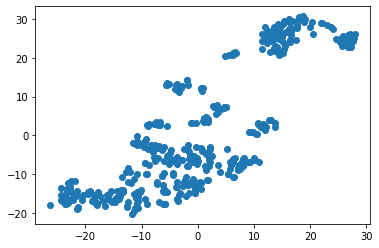

In [32]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [33]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [36]:
l_train = kmeans.fit_predict(X_train_scaled)

In [37]:
l_train.shape

(404,)

In [39]:
pd.value_counts(l_train)

2    191
1    127
0     86
dtype: int64

Text(5, 30, 'Кластер 2')

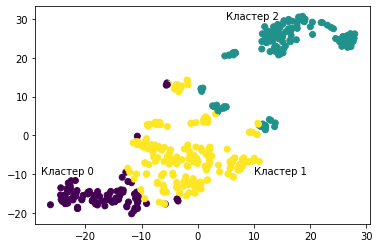

In [44]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=l_train)
plt.text(-28, -10, "Кластер 0")
plt.text(10, -10, "Кластер 1")
plt.text(5, 30, "Кластер 2")

In [48]:
y_train[l_train==0].mean()

price    27.788372
dtype: float64

In [49]:
X_train.loc[l_train==0, "CRIM"].mean()

0.07356558139534886

In [50]:
y_train[l_train==1].mean()

price    16.165354
dtype: float64

In [52]:
X_train.loc[l_train==1, "CRIM"].mean()

10.797028425196853

In [53]:
y_train[l_train==2].mean()

price    24.958115
dtype: float64

In [55]:
X_train.loc[l_train==2, "CRIM"].mean()

0.42166020942408367

#### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [57]:
l_test = kmeans.fit_predict(X_test_scaled)

In [59]:
pd.value_counts(l_test)

1    53
2    35
0    14
dtype: int64

In [60]:
y_test[l_test==0].mean()

price    33.871429
dtype: float64

In [61]:
X_test.loc[l_test==0, "CRIM"].mean()

0.08618571428571427

In [63]:
y_test[l_test==1].mean()

price    21.55283
dtype: float64

In [65]:
X_test.loc[l_test==1, "CRIM"].mean()

0.25200716981132076

In [66]:
y_test[l_test==2].mean()

price    16.437143
dtype: float64

In [67]:
X_test.loc[l_test==2, "CRIM"].mean()

10.165531142857143

Непонятно как-то, на тестовых данных кластеры по другому построились...по сути правильно, а по номерам отличаются?